In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#**Load Data**

In [2]:
data_path = '/content/housing.csv'

In [3]:
df = pd.read_csv(data_path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#**Exploratory Data Analysis**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.describe(include='object').T

,count,unique,top,freq
ocean_proximity,20640,5,<1H OCEAN,9136


In [7]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [8]:
missing_summary = df.isnull().sum()
missing_percentage = (df.isnull().mean() * 100).round(2)
print("Missing values per column:")
print(pd.DataFrame({
    "Missing Values": missing_summary,
    "Percentage": missing_percentage
}).sort_values(by="Percentage", ascending=False))

Missing values per column:
                    Missing Values  Percentage
total_bedrooms                 207         1.0
longitude                        0         0.0
latitude                         0         0.0
housing_median_age               0         0.0
total_rooms                      0         0.0
population                       0         0.0
households                       0         0.0
median_income                    0         0.0
median_house_value               0         0.0
ocean_proximity                  0         0.0


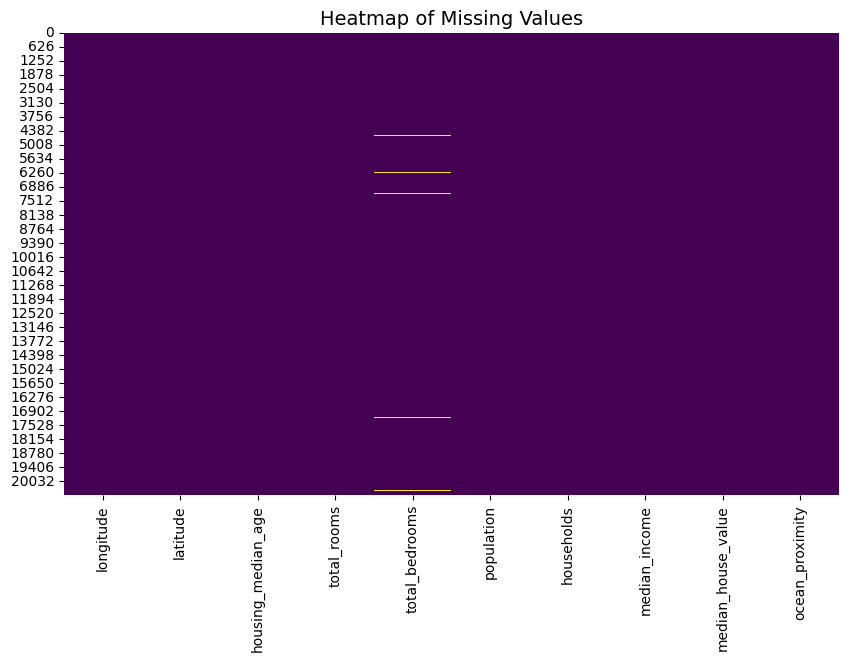

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values", fontsize=14)
plt.show()

In [10]:
df.duplicated().sum()

np.int64(0)

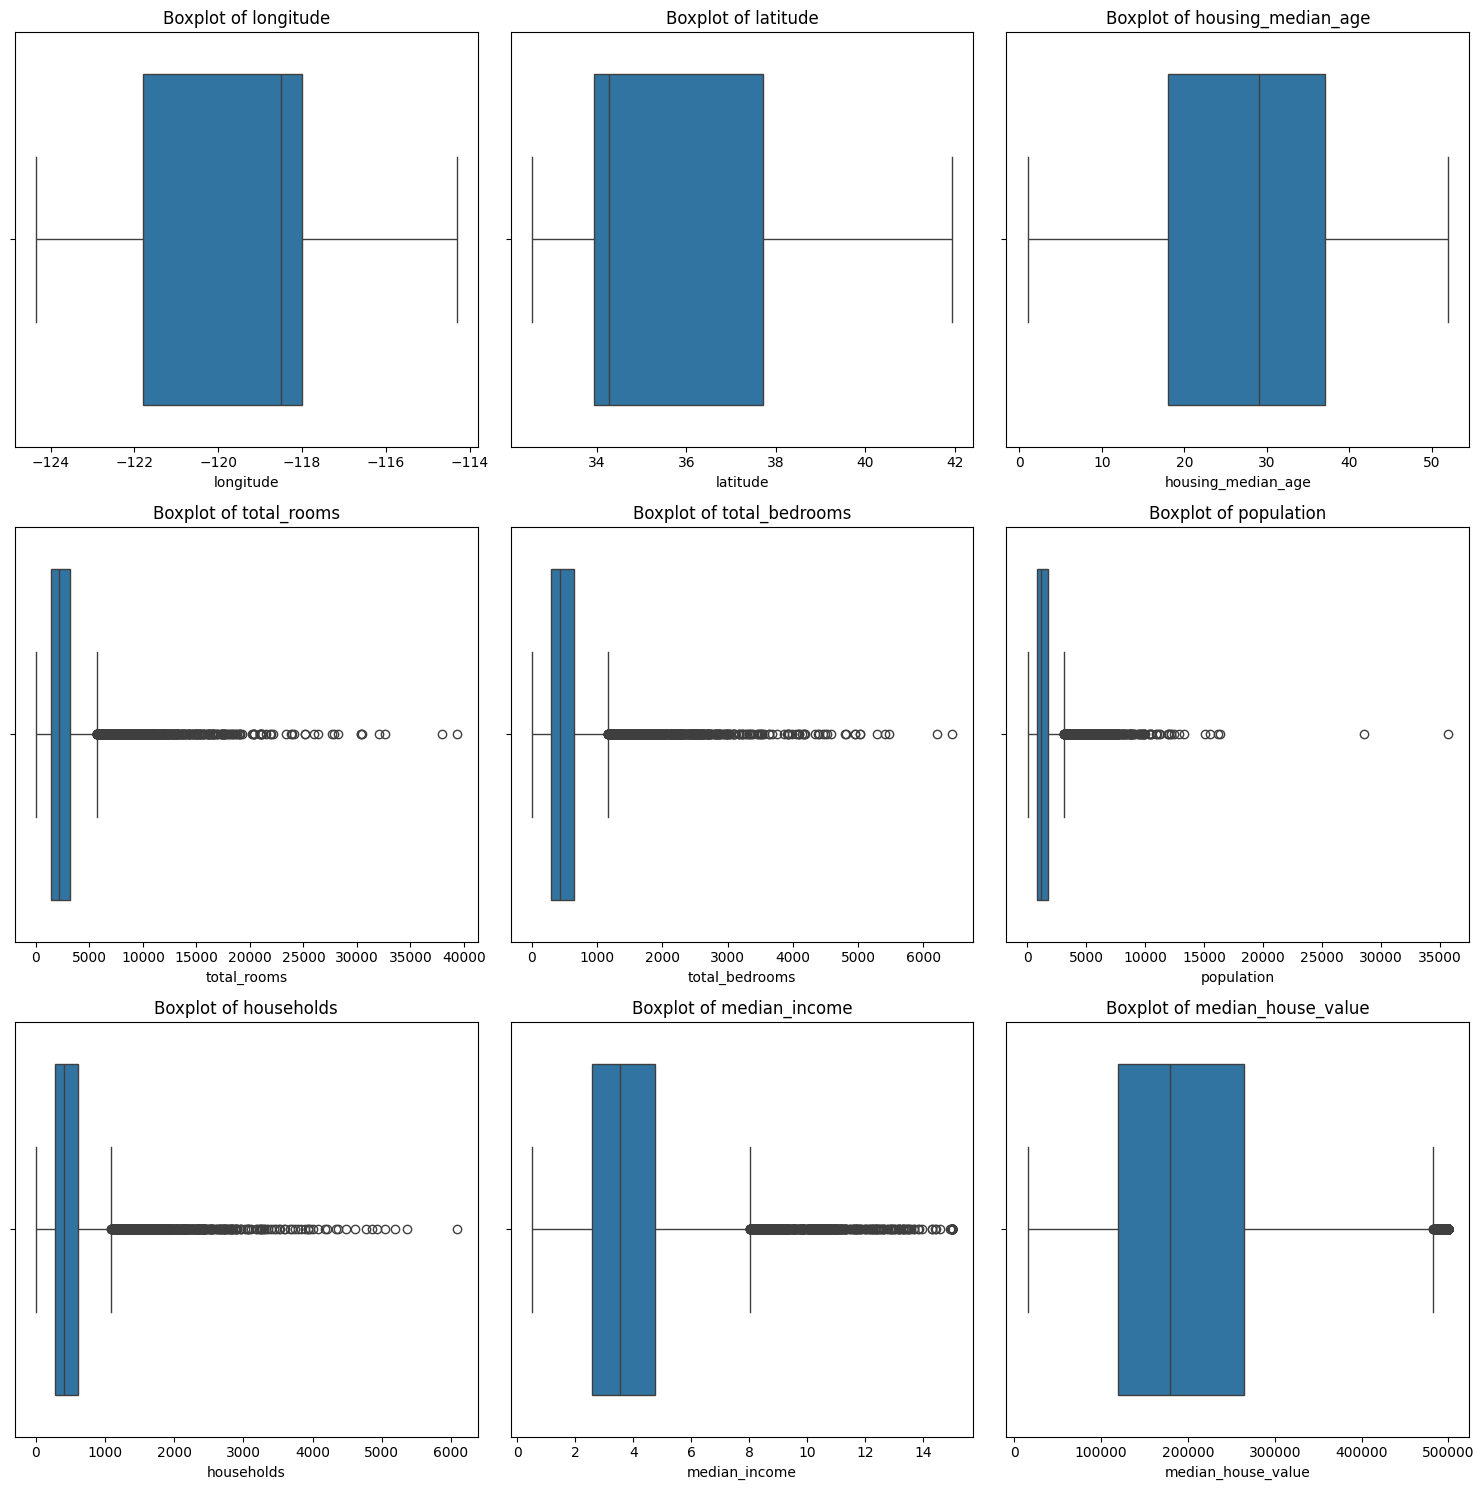

In [11]:
def plot_boxplots(df, n_cols=3):
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    num_cols = [col for col in num_cols if df[col].dropna().shape[0] > 0]

    n_rows = (len(num_cols) + n_cols - 1) // n_cols

    plt.figure(figsize=(15, 5 * n_rows))
    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.boxplot(x=df[col].dropna())
        plt.title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()

plot_boxplots(df)

#**Data Cleaning**

In [12]:
x = df.drop(['median_house_value'],axis = 1)
y = df['median_house_value']

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)
train_data = x_train.join(y_train)
test_data = x_test.join(y_test)

In [13]:
train_data['total_bedrooms'].fillna(train_data['total_bedrooms'].median, inplace=True)
train_data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


In [14]:
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
def outliers_handling(x, p1=0.25 , p2=0.75):
    q1 = x.quantile(p1)
    q3 = x.quantile(p2)
    iqr = q3 - q1
    min_limit = q1 - 1.5 * iqr
    max_limit = q3 + 1.5 * iqr
    return x.clip(lower=min_limit, upper=max_limit)

for col in num_cols:
    train_data[col] = outliers_handling(train_data[col])

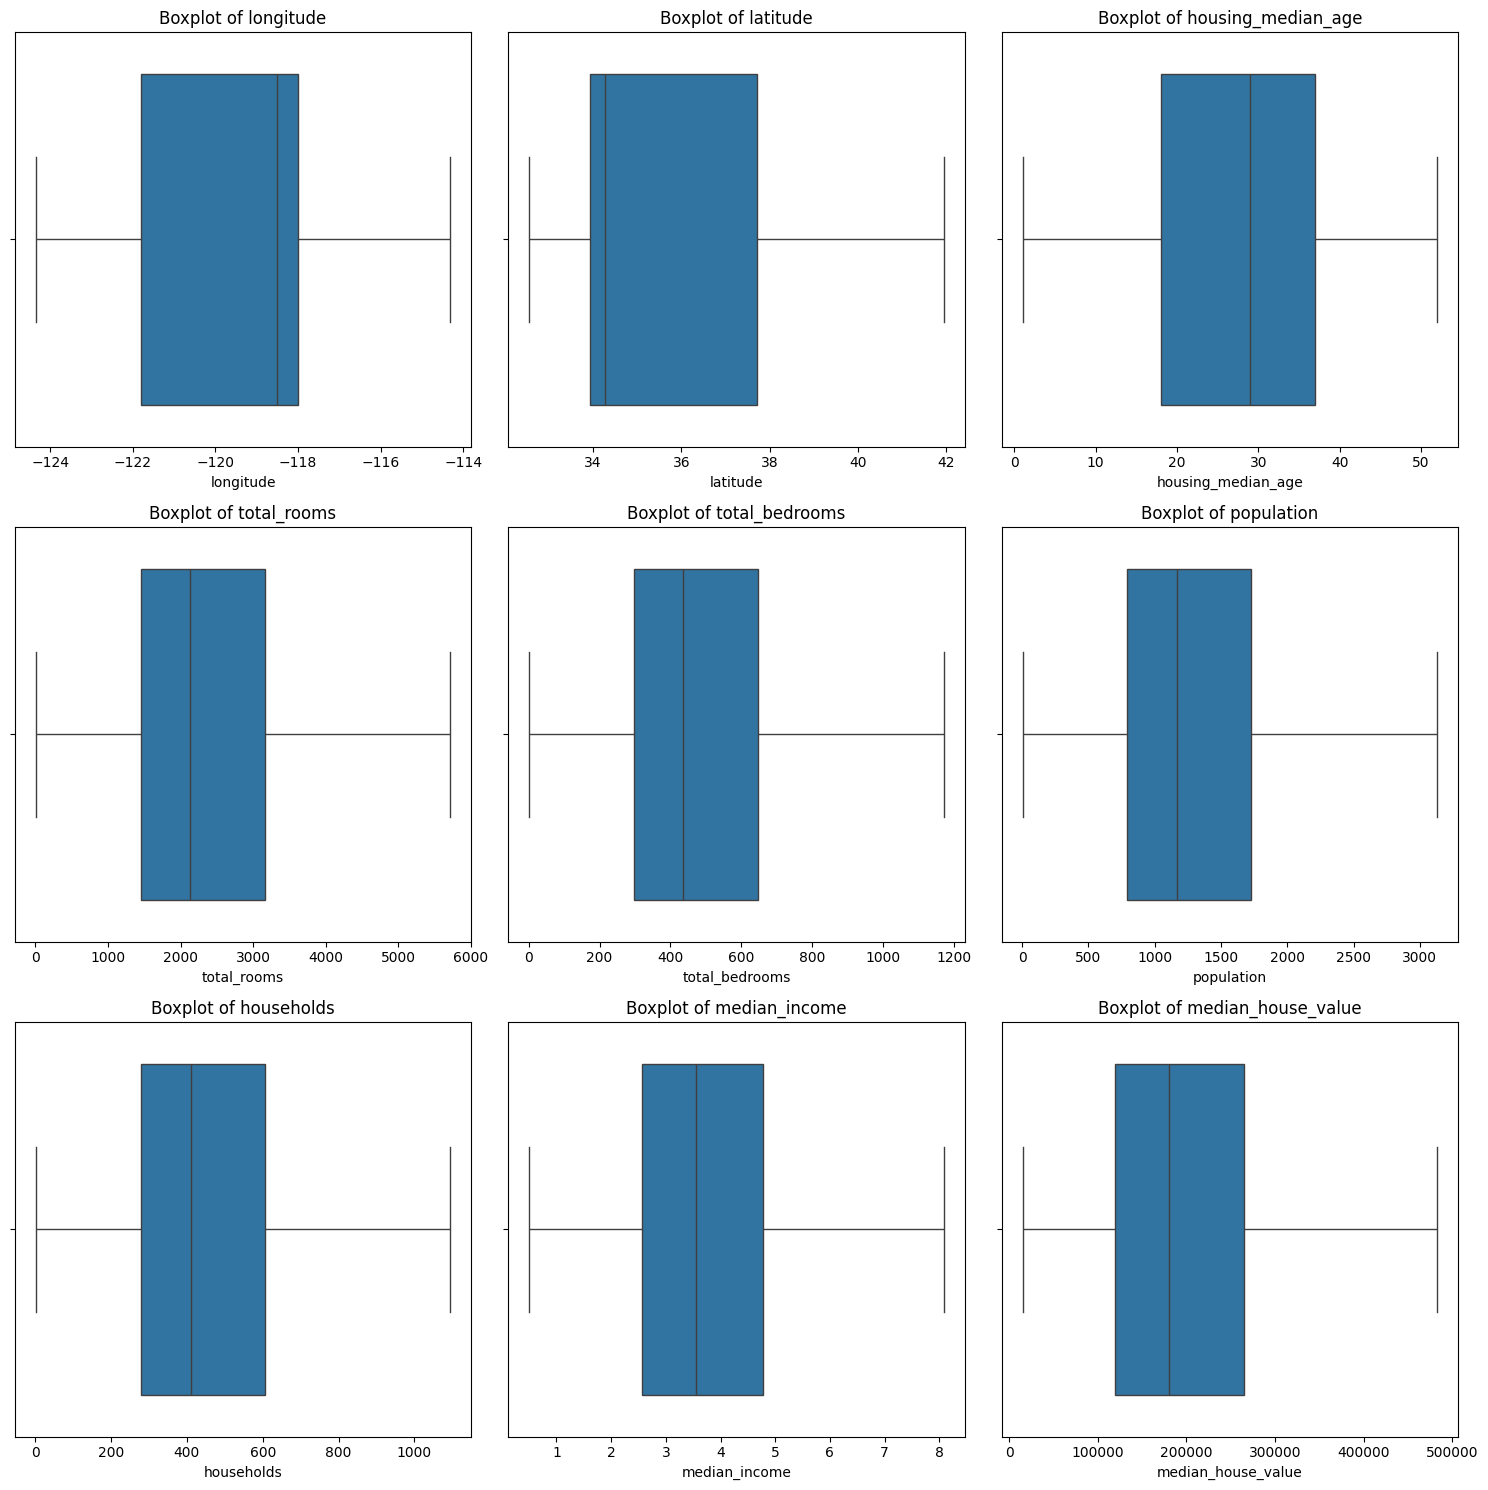

In [15]:
plot_boxplots(train_data)

#**Data Preprocessing & Feature Engineering**

In [16]:
# Interaction between longitude and latitude
train_data["long_lat_interaction"] = train_data["longitude"] * train_data["latitude"]

# Cluster locations into regions (let’s say 5 clusters)
coords = train_data[["longitude", "latitude"]]
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
train_data["region_cluster"] = kmeans.fit_predict(coords)

# Housing Age Features
train_data["is_new_house"] = (train_data["housing_median_age"] < 10).astype(int)
train_data["is_old_house"] = (train_data["housing_median_age"] > 40).astype(int)

# Household Composition Ratios
train_data["rooms_per_household"] = train_data["total_rooms"] / train_data["households"]
train_data["bedrooms_per_room"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["population_per_household"] = train_data["population"] / train_data["households"]

# Bucketize income into categories
train_data["income_category"] = pd.cut(train_data["median_income"],
                               bins=[0, 2, 4, 6, np.inf],
                               labels=["low", "medium", "high", "very_high"])

# Interaction: income with house age
train_data["income_age_interaction"] = train_data["median_income"] * train_data["housing_median_age"]

train_data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,long_lat_interaction,region_cluster,is_new_house,is_old_house,rooms_per_household,bedrooms_per_room,population_per_household,income_category,income_age_interaction
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN,103000.0,-3828.0513,0,0,0,5.017657,0.200576,3.691814,medium,107.5668
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN,382100.0,-3990.2632,3,0,1,4.473545,0.232703,1.738095,medium,186.8125
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN,172600.0,-4175.8368,2,1,0,5.645833,0.174486,2.723214,high,16.6252
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN,93400.0,-3828.3259,0,0,0,4.002817,0.258269,3.994366,low,69.9300
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND,96500.0,-4406.2440,2,0,1,6.268421,0.180940,2.300000,medium,152.8306


In [17]:
train_num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
train_num_cols

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'long_lat_interaction', 'is_new_house',
       'is_old_house', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household', 'income_age_interaction'],
      dtype='object')

In [18]:
train_data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


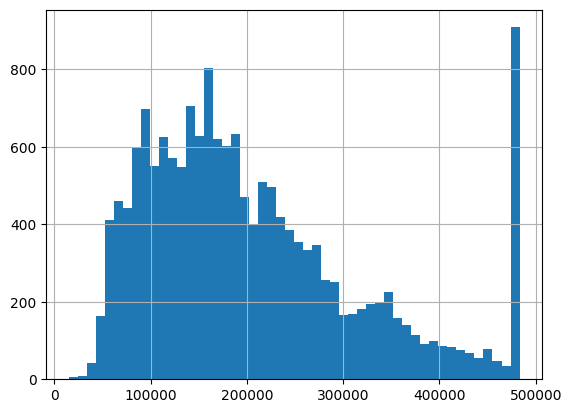

In [19]:
train_data['median_house_value'].hist(bins=50)
plt.show()

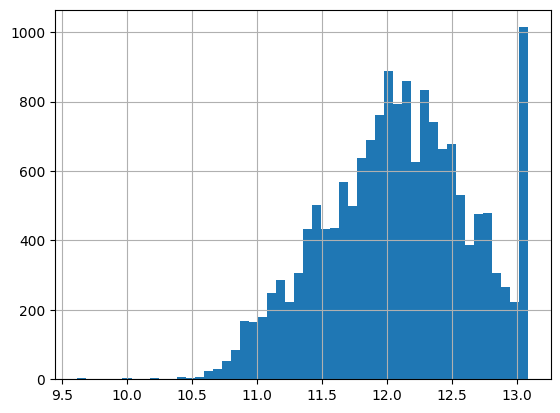

In [20]:
train_data['median_house_value'] = np.log1p(train_data['median_house_value'])
train_data['median_house_value'].hist(bins=50)
plt.show()

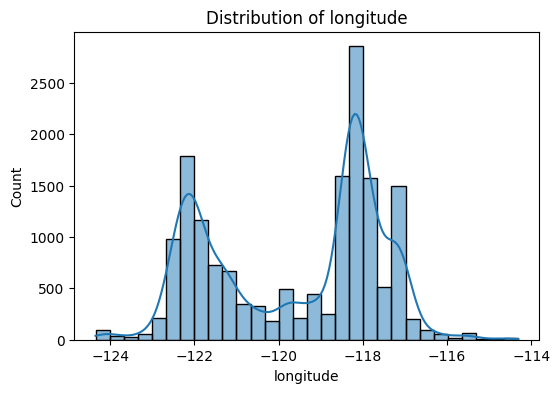

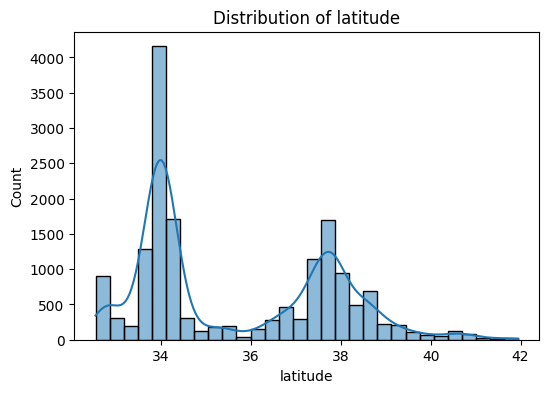

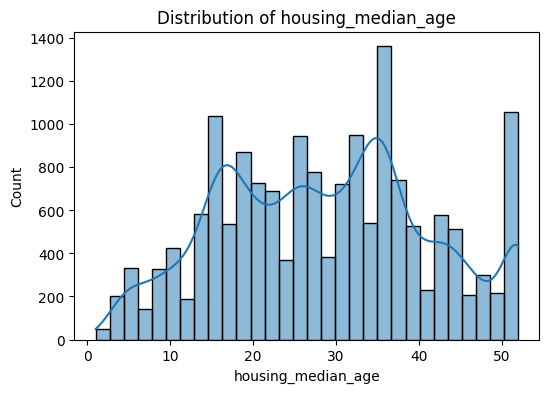

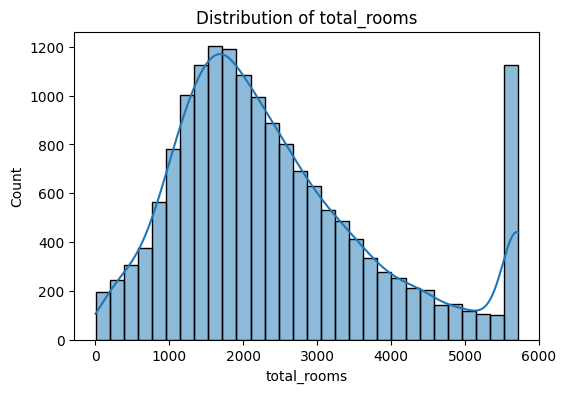

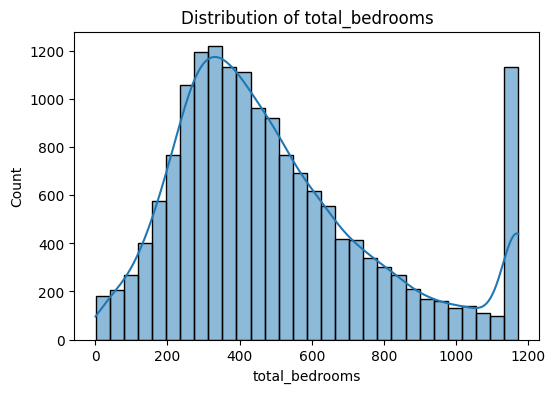

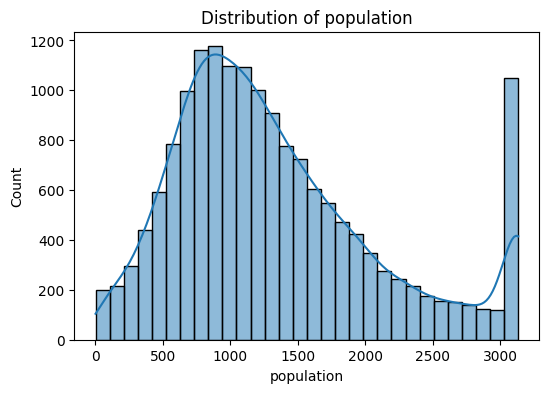

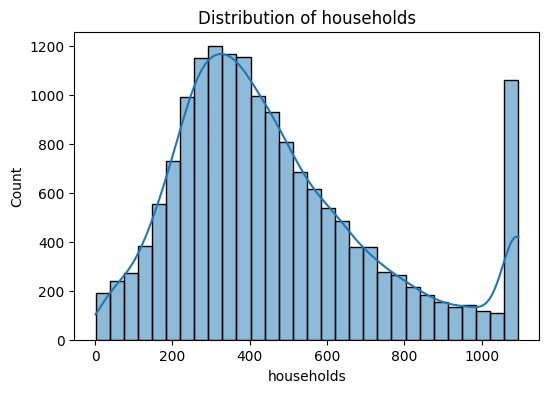

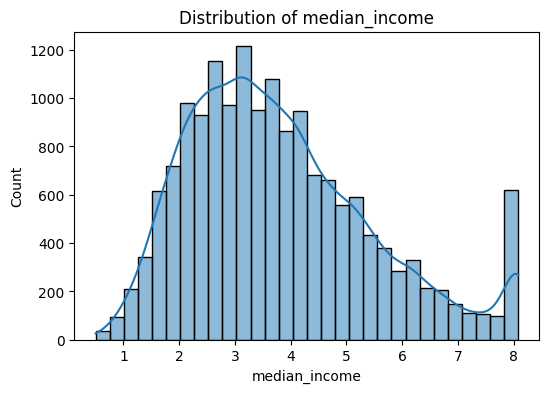

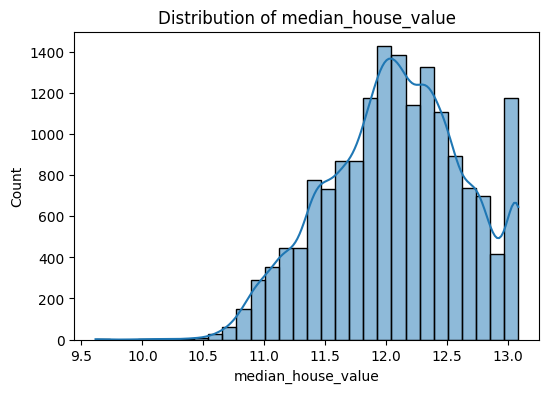

In [21]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(train_data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

In [22]:
features = train_num_cols.drop('median_house_value')
scaler = StandardScaler()

train_data_scaled = train_data.copy()
train_data_scaled[features] = scaler.fit_transform(train_data_scaled[features])

train_data_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,long_lat_interaction,region_cluster,is_new_house,is_old_house,rooms_per_household,bedrooms_per_room,population_per_household,income_category,income_age_interaction
14196,1.272587,-1.372811,0.348490,0.482391,0.429552,1.257726,0.575820,-0.331893,NEAR OCEAN,11.542494,1.352177,0,-0.260460,-0.480575,-0.165314,-0.217364,0.117336,medium,0.022803
8267,0.709162,-0.876696,1.618118,0.664974,0.986366,-0.031355,1.075932,-0.000433,NEAR OCEAN,12.853440,0.851631,3,-0.260460,2.080839,-0.399120,0.356482,-0.220783,medium,1.214199
17445,-0.447603,-0.460146,-1.952710,-0.394149,-0.600554,-0.553001,-0.503368,0.205672,NEAR OCEAN,12.058738,0.278996,2,3.839363,-0.480575,0.104615,-0.683379,-0.050294,high,-1.344432
14265,1.232698,-1.382172,0.586545,-0.733639,-0.475271,0.104613,-0.431923,-1.121484,NEAR OCEAN,11.444657,1.351330,0,-0.260460,-0.480575,-0.601394,0.813146,0.169696,low,-0.543037
2271,-0.108551,0.532084,1.142008,-0.048240,-0.252545,-0.606604,-0.337917,-0.155282,INLAND,11.477309,-0.431984,2,-0.260460,2.080839,0.372142,-0.568091,-0.123537,medium,0.703308


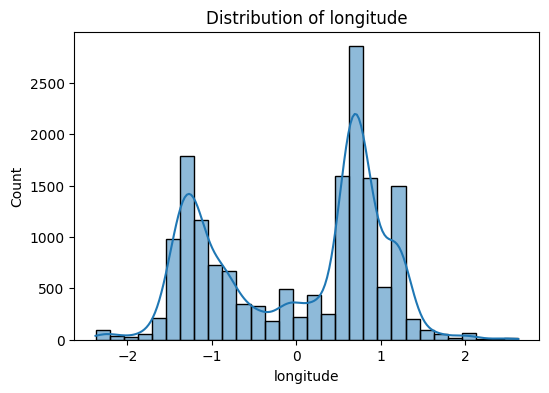

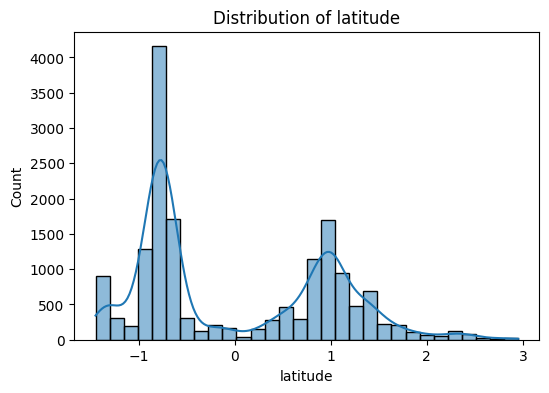

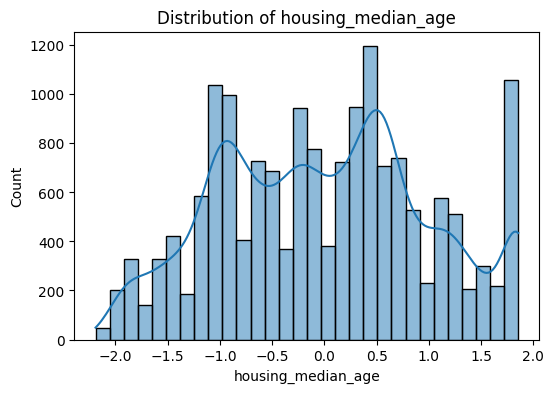

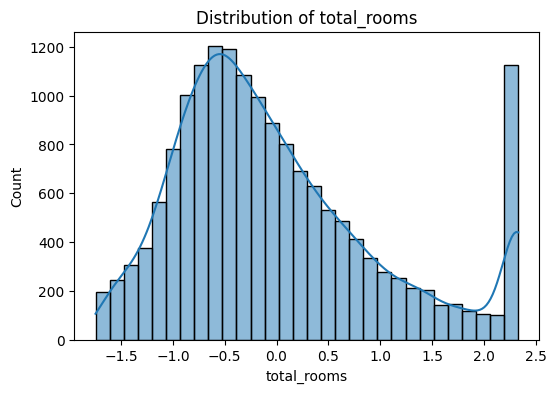

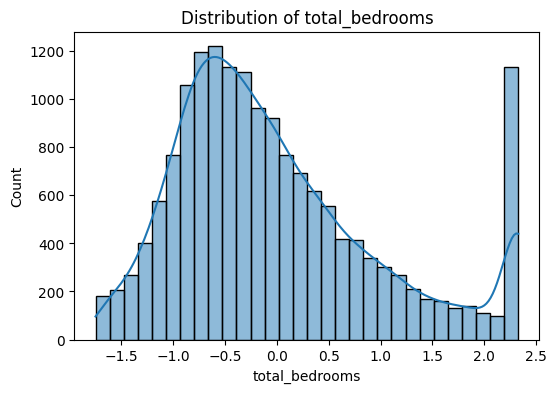

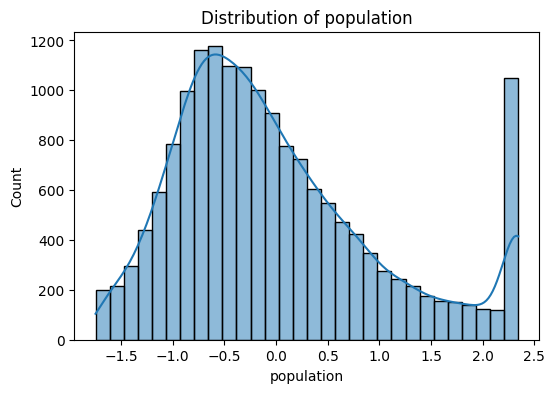

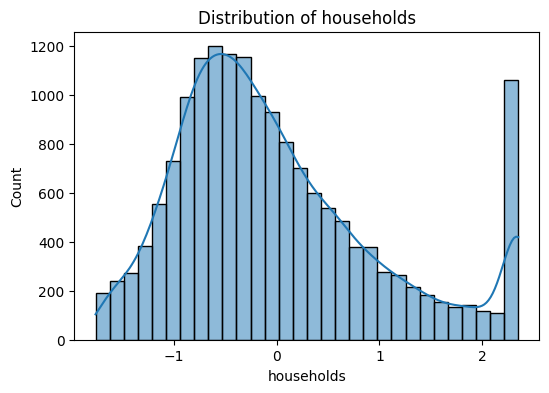

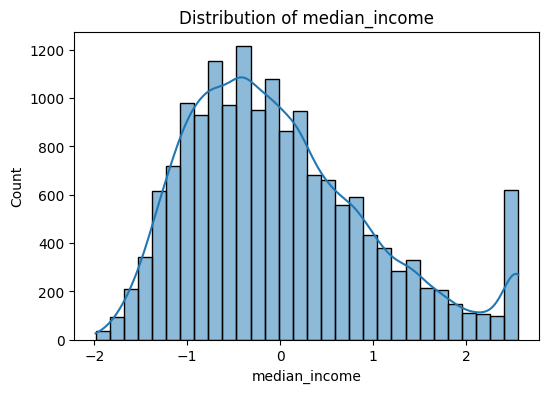

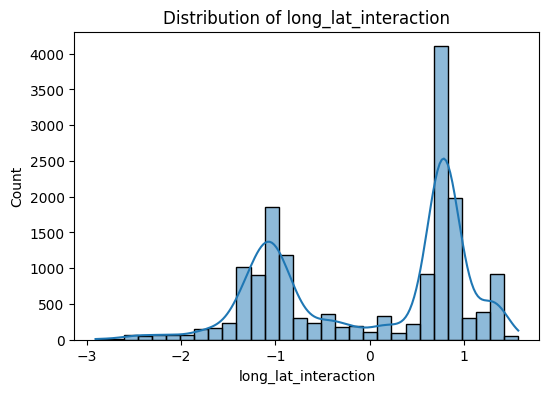

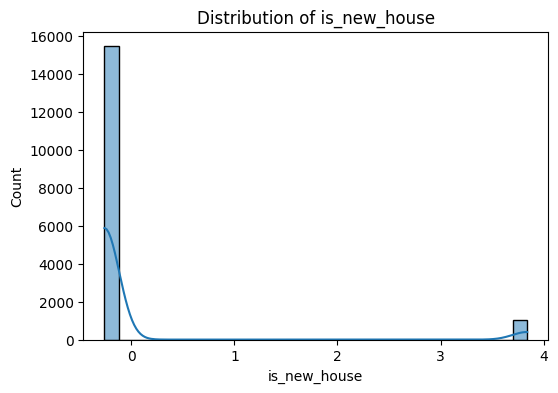

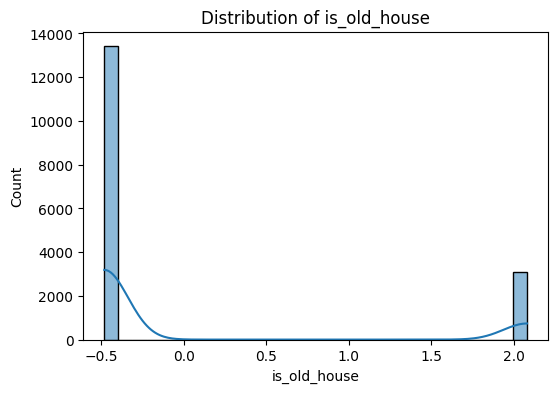

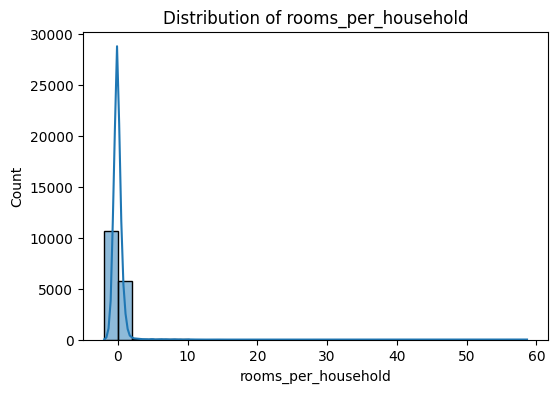

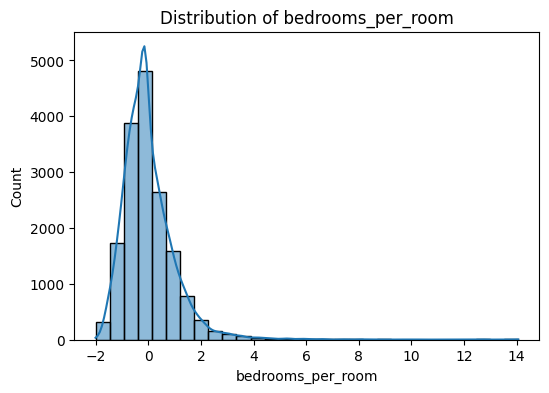

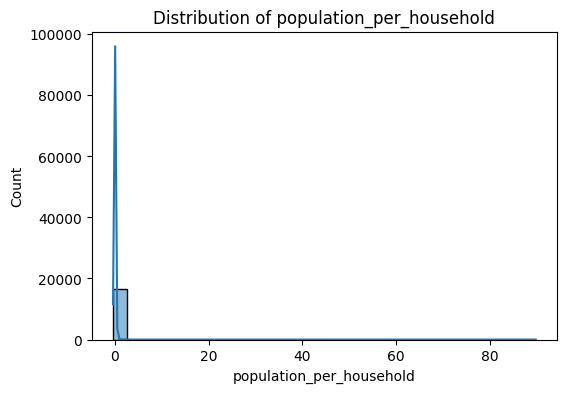

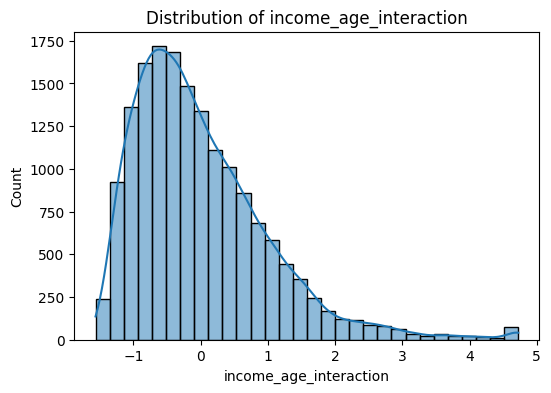

In [23]:
for col in features:
    plt.figure(figsize=(6,4))
    sns.histplot(train_data_scaled[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

<Axes: >

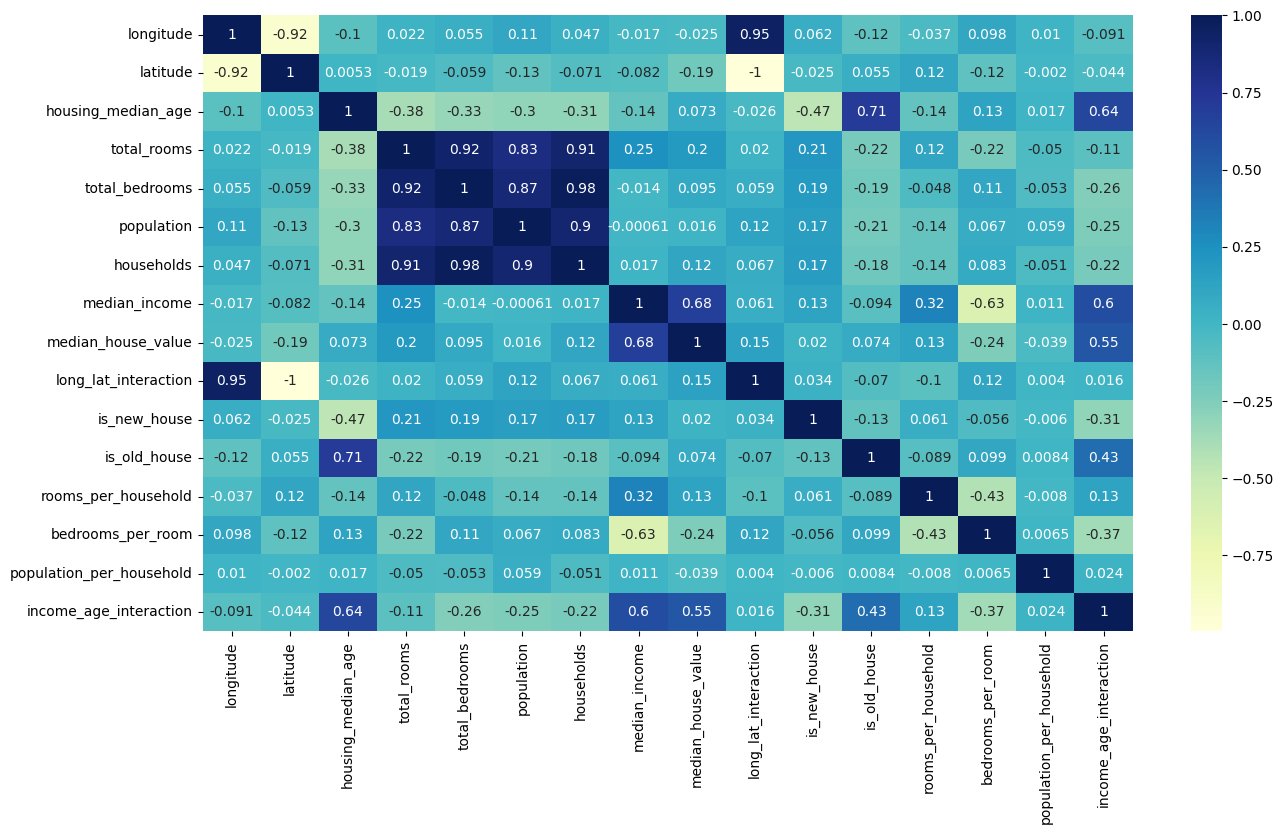

In [24]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data_scaled[train_num_cols].corr(), annot=True, cmap='YlGnBu')

In [25]:
corr = train_data_scaled[train_num_cols].corr()
target_corr = corr['median_house_value'].drop('median_house_value')
target_corr_sorted = target_corr.sort_values(ascending=False)
print(target_corr_sorted)


median_income               0.683121
income_age_interaction      0.547143
total_rooms                 0.196682
long_lat_interaction        0.146290
rooms_per_household         0.125647
households                  0.118142
total_bedrooms              0.095178
is_old_house                0.074389
housing_median_age          0.072646
is_new_house                0.020007
population                  0.016350
longitude                  -0.024660
population_per_household   -0.038608
latitude                   -0.191037
bedrooms_per_room          -0.241355
Name: median_house_value, dtype: float64


In [26]:
drop_features = [
    "long_lat_interaction",
    "households",
    "total_bedrooms",
    "is_new_house",
    "population",
    "longitude",
    "population_per_household"
]

train_data_scaled = train_data_scaled.drop(columns=drop_features)

print(train_data_scaled.columns.tolist())


['latitude', 'housing_median_age', 'total_rooms', 'median_income', 'ocean_proximity', 'median_house_value', 'region_cluster', 'is_old_house', 'rooms_per_household', 'bedrooms_per_room', 'income_category', 'income_age_interaction']


In [27]:
train_data_scaled.head()

,latitude,housing_median_age,total_rooms,median_income,ocean_proximity,median_house_value,region_cluster,is_old_house,rooms_per_household,bedrooms_per_room,income_category,income_age_interaction
14196,-1.372811,0.348490,0.482391,-0.331893,NEAR OCEAN,11.542494,0,-0.480575,-0.165314,-0.217364,medium,0.022803
8267,-0.876696,1.618118,0.664974,-0.000433,NEAR OCEAN,12.853440,3,2.080839,-0.399120,0.356482,medium,1.214199
17445,-0.460146,-1.952710,-0.394149,0.205672,NEAR OCEAN,12.058738,2,-0.480575,0.104615,-0.683379,high,-1.344432
14265,-1.382172,0.586545,-0.733639,-1.121484,NEAR OCEAN,11.444657,0,-0.480575,-0.601394,0.813146,low,-0.543037
2271,0.532084,1.142008,-0.048240,-0.155282,INLAND,11.477309,2,2.080839,0.372142,-0.568091,medium,0.703308


In [28]:
categorical_cols = train_data_scaled.select_dtypes(include=["object","category","bool"]).columns.tolist()
print("Categorical features:", categorical_cols)

# One-Hot Encode all categorical columns
train_data_scaled = pd.get_dummies(train_data_scaled, columns=categorical_cols, drop_first=False)

print(train_data_scaled.dtypes.head())
print("Final shape:", train_data_scaled.shape)


Categorical features: ['ocean_proximity', 'income_category']
latitude              float64
housing_median_age    float64
total_rooms           float64
median_income         float64
median_house_value    float64
dtype: object
Final shape: (16512, 19)


In [29]:
train_data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   latitude                    16512 non-null  float64
 1   housing_median_age          16512 non-null  float64
 2   total_rooms                 16512 non-null  float64
 3   median_income               16512 non-null  float64
 4   median_house_value          16512 non-null  float64
 5   region_cluster              16512 non-null  int32  
 6   is_old_house                16512 non-null  float64
 7   rooms_per_household         16512 non-null  float64
 8   bedrooms_per_room           16512 non-null  float64
 9   income_age_interaction      16512 non-null  float64
 10  ocean_proximity_<1H OCEAN   16512 non-null  bool   
 11  ocean_proximity_INLAND      16512 non-null  bool   
 12  ocean_proximity_ISLAND      16512 non-null  bool   
 13  ocean_proximity_NEAR BAY    1651

In [30]:
train_data_scaled.head()

,latitude,housing_median_age,total_rooms,median_income,median_house_value,region_cluster,is_old_house,rooms_per_household,bedrooms_per_room,income_age_interaction,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,income_category_low,income_category_medium,income_category_high,income_category_very_high
14196,-1.372811,0.348490,0.482391,-0.331893,11.542494,0,-0.480575,-0.165314,-0.217364,0.022803,False,False,False,False,True,False,True,False,False
8267,-0.876696,1.618118,0.664974,-0.000433,12.853440,3,2.080839,-0.399120,0.356482,1.214199,False,False,False,False,True,False,True,False,False
17445,-0.460146,-1.952710,-0.394149,0.205672,12.058738,2,-0.480575,0.104615,-0.683379,-1.344432,False,False,False,False,True,False,False,True,False
14265,-1.382172,0.586545,-0.733639,-1.121484,11.444657,0,-0.480575,-0.601394,0.813146,-0.543037,False,False,False,False,True,True,False,False,False
2271,0.532084,1.142008,-0.048240,-0.155282,11.477309,2,2.080839,0.372142,-0.568091,0.703308,False,True,False,False,False,False,True,False,False


In [31]:
# Convert bool columns to int
bool_cols = train_data_scaled.select_dtypes(include=["bool"]).columns
train_data_scaled[bool_cols] = train_data_scaled[bool_cols].astype(int)

In [32]:
train_data_scaled.head()

,latitude,housing_median_age,total_rooms,median_income,median_house_value,region_cluster,is_old_house,rooms_per_household,bedrooms_per_room,income_age_interaction,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,income_category_low,income_category_medium,income_category_high,income_category_very_high
14196,-1.372811,0.348490,0.482391,-0.331893,11.542494,0,-0.480575,-0.165314,-0.217364,0.022803,0,0,0,0,1,0,1,0,0
8267,-0.876696,1.618118,0.664974,-0.000433,12.853440,3,2.080839,-0.399120,0.356482,1.214199,0,0,0,0,1,0,1,0,0
17445,-0.460146,-1.952710,-0.394149,0.205672,12.058738,2,-0.480575,0.104615,-0.683379,-1.344432,0,0,0,0,1,0,0,1,0
14265,-1.382172,0.586545,-0.733639,-1.121484,11.444657,0,-0.480575,-0.601394,0.813146,-0.543037,0,0,0,0,1,1,0,0,0
2271,0.532084,1.142008,-0.048240,-0.155282,11.477309,2,2.080839,0.372142,-0.568091,0.703308,0,1,0,0,0,0,1,0,0


#**Model Training**

In [33]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso , ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [34]:
x_train = train_data_scaled.drop('median_house_value', axis=1)
y_train = train_data_scaled['median_house_value']

In [35]:
param_grids = {
    'Ridge': {'alpha': [0.01, 0.1, 1, 10, 100]},
    'Lasso': {'alpha': [0.01, 0.1, 1, 10, 100]},
    'DecisionTreeRegressor': {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'RandomForestRegressor': {
        'n_estimators': [100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'KNeighborsRegressor': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'SVR': {
        'kernel': ['rbf'],
        'C': [1, 10],
        'gamma': ['scale']
    }
}

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'SVR': SVR(),
}

model_results = {}

for model_name, model in models.items():
    print(f"\nTuning {model_name}...")

    if model_name in param_grids:
        grid = GridSearchCV(model, param_grids[model_name],
                            cv=5, scoring='r2', n_jobs=-1)
        grid.fit(x_train, y_train)
        best_model = grid.best_estimator_
        best_score = grid.best_score_
        print(f"Best Params for {model_name}: {grid.best_params_}")
    else:
        scores = cross_val_score(model, x_train, y_train, cv=3, scoring='r2')
        best_score = scores.mean()
        best_model = model

    model_results[model_name] = best_score
    print(f"{model_name}: Mean R² Score = {best_score:.4f}")

print("\nFinal Results After Hyperparameter Tuning:")
for model_name, score in model_results.items():
    print(f"{model_name}: {score:.4f}")



Tuning LinearRegression...
LinearRegression: Mean R² Score = 0.6708

Tuning Ridge...
Best Params for Ridge: {'alpha': 0.1}
Ridge: Mean R² Score = 0.6707

Tuning Lasso...
Best Params for Lasso: {'alpha': 0.01}
Lasso: Mean R² Score = 0.6617

Tuning DecisionTreeRegressor...
Best Params for DecisionTreeRegressor: {'max_depth': 10, 'min_samples_split': 10}
DecisionTreeRegressor: Mean R² Score = 0.6901

Tuning RandomForestRegressor...
Best Params for RandomForestRegressor: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
RandomForestRegressor: Mean R² Score = 0.7641

Tuning KNeighborsRegressor...
Best Params for KNeighborsRegressor: {'n_neighbors': 9, 'weights': 'distance'}
KNeighborsRegressor: Mean R² Score = 0.7225

Tuning SVR...
Best Params for SVR: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVR: Mean R² Score = 0.7493

Final Results After Hyperparameter Tuning:
LinearRegression: 0.6708
Ridge: 0.6707
Lasso: 0.6617
DecisionTreeRegressor: 0.6901
RandomForestRegressor: 0.764

In [36]:
import joblib

# Suppose Random Forest was best
best_model = RandomForestRegressor(
    n_estimators=200, max_depth=20, min_samples_split=2, random_state=42
)
best_model.fit(x_train, y_train)

joblib.dump(best_model, "best_model.pkl")
print("Model saved successfully!")


Model saved successfully!
